# 1次元場PDE - 応用編 -

## Burgers方程式

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

ナビエストークス方程式の移流項$u\partial_x u$と粘性項$\partial_{xx} u$のみを考慮する．
$$
    \partial_t u + \lambda_1 u\partial_x u = \lambda_2 \partial_{xx} u
$$

移流拡散方程式とも呼ばれている．

In [27]:
# parameters
nx = 100
Δx = 1.0/(nx-1)
λ1 = 1.0; λ2 = 0.1; 
# init
x  = np.linspace(0.0,1.0,nx) 
u  = np.zeros_like(x)
u[10:30]  = 1.0
init   = u
# time
t_span = [0.,0.5]
t_eval = np.linspace(*t_span,50) # time for sampling
# ODEs
def ODEs(t,u,λ1,λ2,Δx):
    du = - λ1 * (np.diff(u)/(Δx))[1:] + λ2 * np.diff(u,2)/(Δx**2)
    return np.hstack([0.0,du,0.0])
# solve
sol = solve_ivp(ODEs,t_span,init,method="RK45",t_eval=t_eval,args=(λ1,λ2,Δx))

進行しながら滑らかになる様子が見れる．

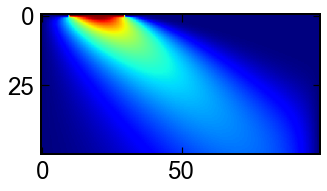

In [28]:
fig,ax = plt.subplots()
ax.imshow(sol.y.T,cmap='jet')

## KdV方程式

コルトヴェーグと，ド・フリースにより定式化された．非線形波を表す方程式．
$$
    \partial_t u + 6u \partial_x u + \partial_{xxx}u=0
$$

パラメータは，この論文を参考にさせていただいた．
http://advances.sciencemag.org/content/3/4/e1602614

In [66]:
# parameters
nx = 200
Δx = 60./(nx-1)
# init
x  = np.linspace(0.0,60.0,nx) 
u  = np.exp(-((x-10.0)/(5.0))**2)
init   = u
# time
t_span = [0.,20.0]
t_eval = np.linspace(*t_span,100) # time for sampling
# ODEs
def ODEs(t,u,Δx):
    du = - 6 * u[2:-2] * np.convolve(u,[1.,0.,-1.],'valid')[1:-1]/(2*Δx) - np.diff(u,3)[1:]/(Δx**3)
    return np.hstack([0.,0.,du,0.,0.])
# solve
sol = solve_ivp(ODEs,t_span,init,method="RK45",t_eval=t_eval,args=(Δx,),rtol=1e-8)

正規分布の初期速度を置いた．時間の進行とともに幾つかの孤立波になる．

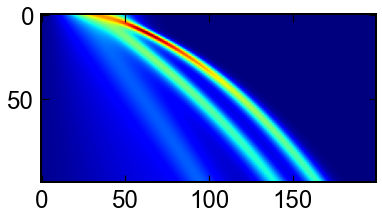

In [67]:
fig,ax = plt.subplots()
ax.imshow(sol.y.T,cmap='jet')

## KS方程式

蔵元ーシバシンスキー方程式．火砕流の挙動を表すよう定式化された．4階微分が特徴的．拡散の強さが拡散する．
$$
    \partial_t u + u\partial_x u + \partial_{xx} u + \partial_{xxxx} u = 0
$$

In [73]:
# parameters
nx = 200
Δx = 100./(nx-1)
# init
x  = np.linspace(0.0,60.0,nx) 
u  = np.exp(-((x-40.0)/(5.0))**2) + np.exp(-((x-60.0)/(5.0))**2)
init   = u
# time
t_span = [0.,100.0]
t_eval = np.linspace(*t_span,100) # time for sampling
# ODEs
def ODEs(t,u,Δx):
    du = - u[2:-2] * np.convolve(u,[1.,0.,-1.],'valid')[1:-1]/(2*Δx)\
         - np.diff(u,2)[1:-1]/(Δx**2)\
         - np.diff(u,4)      /(Δx**4)
    return np.hstack([0.,0.,du,0.,0.])
# solve
sol = solve_ivp(ODEs,t_span,init,method="RK45",t_eval=t_eval,args=(Δx,),rtol=1e-8)

インパクトあって目に楽しい図ができる

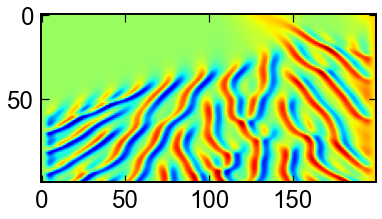

In [74]:
fig,ax = plt.subplots()
ax.imshow(sol.y.T,cmap='jet')

## Schorodinger方程式

理系大学生の関門として名高いシュレディンガー方程式．数値計算を通してイメージを掴んでみよう．
一次元では，定数を1，二次関数型のポテンシャル場$V(x)=x^2/2$を考えると以下の形で書ける．
$$
    i\partial_t \Psi = -\left(\frac{1}{2}\partial_{xx}- \frac{x^2}{2}\right)\Psi
$$

ちなみにsolve_ivpはcomplexもrealと変わらず扱える．すごい!

In [110]:
# parameters
nx = 200
Δx = 15./(nx-1)
# init
x  = np.linspace(-7.5,7.5,nx) 
Ψ  = 2.*np.exp(-x**2) + 0.j
init   = Ψ
# time
t_span = [0.,20.0]
t_eval = np.linspace(*t_span,400) # time for sampling
# ODEs
def ODEs(t,Ψ,Δx):
    dΨ = -1.j*(- 0.5*np.diff(Ψ,2)/(Δx**2) + 0.5*(x**2*Ψ)[1:-1])
    return np.hstack([0.+0.j,dΨ,0.+0.j])
# solve
sol = solve_ivp(ODEs,t_span,init,method="RK45",t_eval=t_eval,args=(Δx,),rtol=1e-8)

ポテンシャルによって電子波が中心にトラップされている．

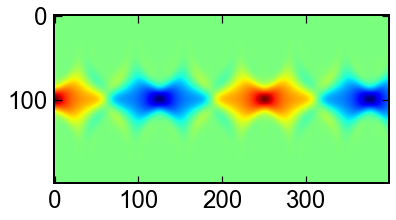

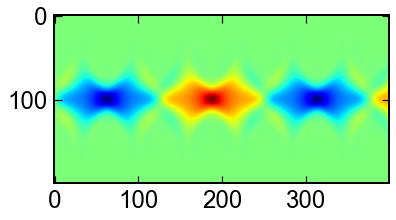

In [111]:
fig,ax = plt.subplots()
ax.imshow(sol.y[:].real,cmap='jet')
fig,ax = plt.subplots()
ax.imshow(sol.y[:].imag,cmap='jet')

## Non-linear Schirodinger方程式

ポテンシャル関数が$V(x)=|\Psi|^2$(引力)のときも有名．
$$
    i\partial_t \Psi = -\left(\frac{1}{2}\partial_{xx}+ |\Psi|^2\right)\Psi
$$


In [108]:
# parameters
nx = 200
Δx = 10./(nx-1)
# init
x  = np.linspace(-5.0,5.0,nx) 
Ψ  = 2.*np.exp(-x**2) + 0.j
init   = Ψ
# time
t_span = [0.,np.pi]
t_eval = np.linspace(*t_span,400) # time for sampling
# ODEs
def ODEs(t,Ψ,Δx):
    dΨ = -1.j*(- 0.5*np.diff(Ψ,2)/(Δx**2) - (np.abs(Ψ)**2*Ψ)[1:-1])
    return np.hstack([0.+0.j,dΨ,0.+0.j])
# solve
sol = solve_ivp(ODEs,t_span,init,method="RK45",t_eval=t_eval,args=(Δx,),rtol=1e-8)

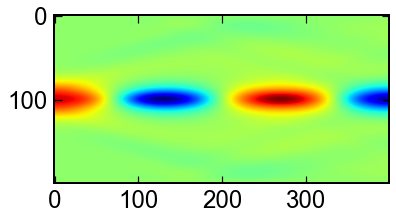

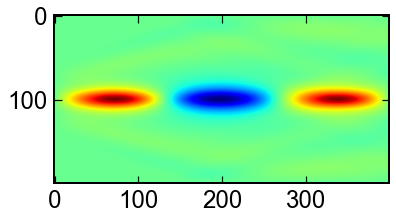

In [109]:
fig,ax = plt.subplots()
ax.imshow(sol.y[:].real,cmap='jet')
fig,ax = plt.subplots()
ax.imshow(sol.y[:].imag,cmap='jet')